In [1]:
import pickle
import os
import urllib

import numpy as np
from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA
import cv2
import glob
from collections import defaultdict
import pandas as pd


In [2]:
bird_images_folder = "/media/niranjan/T7/bird_data_collection/20250802_212013"
bird_image_path = glob.glob(os.path.join(bird_images_folder, "*.jpeg"))
# image_name = "20250802_212132_0234.jpeg"
# img = cv2.imread(os.path.join(bird_images, image_name))[:,:,::-1]
crop_params = [600, 1000, 1300, 1500]

Total number of images: 1000
Processing frame 0
Processing frame 50
Processing frame 100
Processing frame 150
Processing frame 200
Processing frame 250
Processing frame 300
Processing frame 350
Processing frame 400
Processing frame 450
Processing frame 500
Processing frame 550
Processing frame 600
Processing frame 650
Processing frame 700
Processing frame 750
Processing frame 800
Processing frame 850
Processing frame 900
Processing frame 950


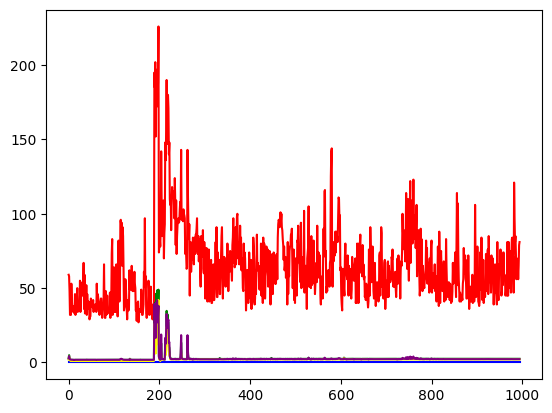

In [4]:
print (f"Total number of images: {len(bird_image_path)}")

def get_img(index, image_list):
    img = cv2.imread(image_list[index])[:,:,::-1]
    img_cropped = img[crop_params[1]:crop_params[1]+crop_params[3], crop_params[0]:crop_params[0]+crop_params[2], :]
    return img_cropped

def get_diff_stats(img1, img2):
    stats = {}
    new_img = np.abs(img1.astype(np.float32) - img2.astype(np.float32))
    stats["max"] = np.max(new_img)
    stats["min"] = np.min(new_img)
    stats["mean"] = np.mean(new_img)
    stats["median"] = np.median(new_img)
    stats["std"] = np.std(new_img)
    return stats

stats_dict = defaultdict(list)
for i in range(0,995):
    if i % 50 == 0:
        print (f"Processing frame {i}")
    img1 = get_img(i, bird_image_path)
    img2 = get_img(i+1, bird_image_path)
    stats = get_diff_stats(img1, img2)
    for key, value in stats.items():
        stats_dict[f"{key}"].append(value)
    stats_dict[f"frame_number"].append(i)

stats_df = pd.DataFrame(stats_dict)
plt.plot(stats_df["frame_number"], stats_df["max"], color="red")
plt.plot(stats_df["frame_number"], stats_df["min"], color="blue")
plt.plot(stats_df["frame_number"], stats_df["mean"], color="green")
plt.plot(stats_df["frame_number"], stats_df["median"], color="yellow")
plt.plot(stats_df["frame_number"], stats_df["std"], color="purple")
plt.show()


/tmp/ipykernel_528411/1517788674.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


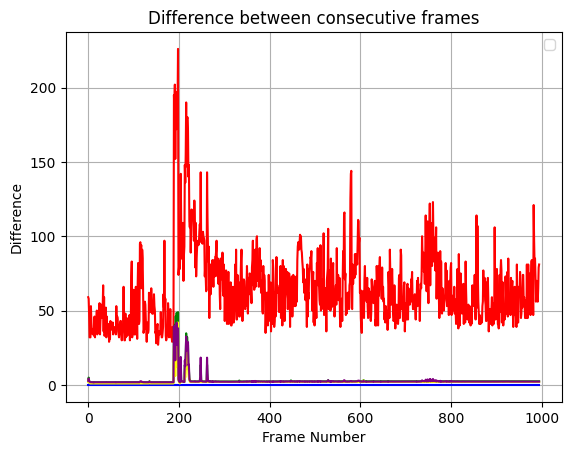

In [5]:
plt.plot(stats_df["frame_number"], stats_df["max"], color="red")
plt.plot(stats_df["frame_number"], stats_df["min"], color="blue")
plt.plot(stats_df["frame_number"], stats_df["mean"], color="green")
plt.plot(stats_df["frame_number"], stats_df["median"], color="yellow")
plt.plot(stats_df["frame_number"], stats_df["std"], color="purple")
plt.grid(True)
plt.legend()
plt.xlabel("Frame Number")
plt.ylabel("Difference")
plt.title("Difference between consecutive frames")
plt.show()

In [35]:
index = 500
gap = 200
img1 = get_img(index, bird_image_path)
img2 = get_img(index+gap, bird_image_path)
new_img = np.abs(img1.astype(np.float32) - img2.astype(np.float32))
# apply gaussian blur to new_img
# new_img = cv2.GaussianBlur(new_img, (5, 5), 0)
print (f"Max difference: {np.max(new_img)}")
print (f"Min difference: {np.min(new_img)}")
print (f"Mean difference: {np.mean(new_img)}")
print (f"Median difference: {np.median(new_img)}")
print (f"Std difference: {np.std(new_img)}")
# print the pixel with max difference
print (f"Pixel with max difference: {np.unravel_index(np.argmax(new_img), new_img.shape)}")

# plt.imshow(new_img)

Max difference: 99.0
Min difference: 0.0
Mean difference: 4.619586944580078
Median difference: 3.0
Std difference: 5.454214096069336
Pixel with max difference: (np.int64(1360), np.int64(88), np.int64(0))


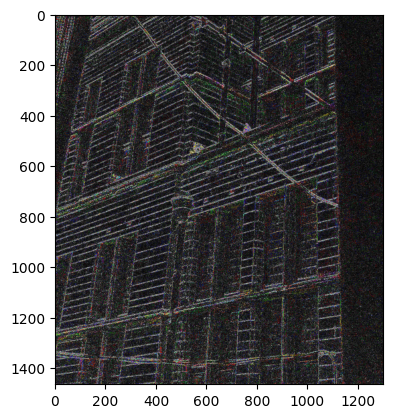

In [38]:
plt.imshow((new_img*10).astype(np.uint8))

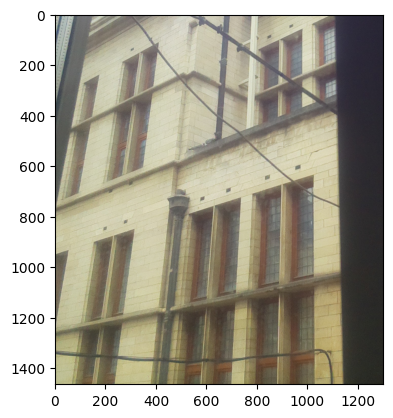

In [14]:
plt.imshow(img1)

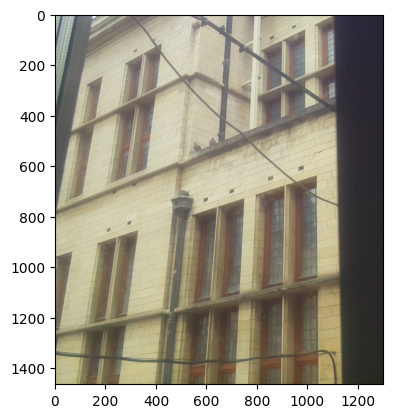

In [15]:
plt.imshow(img2)